In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail = pd.read_csv("Retail_Prices_of _Products.csv")

In [3]:
retail.drop_duplicates()

,Year,Month,GEO,Product Category,Products,VALUE,Taxable,Total tax rate,Value after tax,Essential,COORDINATE,UOM
0,2017,January,Province 1,Meat & Poultry,"Beef stewing cuts, per kilogram",12.66,No,11.0,12.66,Essential,11.100,Dollars
1,2017,January,Province 1,Meat & Poultry,"Beef striploin cuts, per kilogram",21.94,No,11.0,21.94,Essential,11.200,Dollars
2,2017,January,Province 1,Meat & Poultry,"Beef top sirloin cuts, per kilogram",13.44,No,11.0,13.44,Essential,11.300,Dollars
3,2017,January,Province 1,Meat & Poultry,"Beef rib cuts, per kilogram",20.17,No,11.0,20.17,Essential,11.410,Dollars
4,2017,January,Province 1,Meat & Poultry,"Ground beef, per kilogram",9.12,No,11.0,9.12,Essential,11.400,Dollars
...,...,...,...,...,...,...,...,...,...,...,...,...
118477,2025,February,Province 11,Nuts & Snacks,"Sunflower seeds, 400 grams",4.50,No,12.0,4.50,Non-Essential,10.109,Dollars
118478,2025,February,Province 11,Toiletries & Cleaning,"Deodorant, 85 grams",8.07,Yes,12.0,9.04,Essential,10.750,Dollars
118479,2025,February,Province 11,Toiletries & Cleaning,"Toothpaste, 100 millilitres",4.13,Yes,12.0,4.63,Essential,10.760,Dollars
118480,2025,February,Province 11,Toiletries & Cleaning,"Shampoo, 400 millilitres",7.18,Yes,12.0,8.04,Essential,10.770,Dollars


In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              118482 non-null  int64  
 1   Month             118482 non-null  object 
 2   GEO               118482 non-null  object 
 3   Product Category  118482 non-null  object 
 4   Products          118482 non-null  object 
 5   VALUE             118482 non-null  float64
 6   Taxable           118482 non-null  object 
 7   Total tax rate    118482 non-null  float64
 8   Value after tax   118482 non-null  float64
 9   Essential         118482 non-null  object 
 10  COORDINATE        118482 non-null  float64
 11  UOM               118482 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 10.8+ MB


In [5]:
retail.rename(columns={"GEO":"Geographic Location","VALUE":"Price","Value after tax":"Value After Tax"},inplace=True)

In [6]:
retail.set_index("Year",inplace=True)

In [7]:
#Most Expensive Product Category

retail[["Product Category","Price"]].sort_values('Price',ascending=False).head(20)

,Product Category,Price
Year,,
2025,Meat & Poultry,48.45
2025,Infant & Baby Products,48.35
2025,Infant & Baby Products,48.35
2024,Infant & Baby Products,47.69
2024,Infant & Baby Products,47.52
2025,Infant & Baby Products,47.27
2024,Infant & Baby Products,47.18
2024,Infant & Baby Products,46.94
2025,Infant & Baby Products,46.86


In [8]:
retail.groupby("Product Category")["Price"].mean()

Product Category
Beverages                  4.873358
Canned & Jarred Goods      2.643893
Cooking Essentials         6.871421
Dairy & Eggs               4.404695
Frozen Foods               3.513801
Fruits                     3.835390
Grains & Bakery            4.001490
Infant & Baby Products    16.725756
Legumes & Dry Goods        3.127724
Meat & Poultry            10.755227
Nuts & Snacks              4.292897
Other                      0.760612
Toiletries & Cleaning      7.181556
Vegetables                 3.563373
Name: Price, dtype: float64

In [9]:
retail.groupby("Product Category")["Price"].mean().sort_values(ascending=False)

Product Category
Infant & Baby Products    16.725756
Meat & Poultry            10.755227
Toiletries & Cleaning      7.181556
Cooking Essentials         6.871421
Beverages                  4.873358
Dairy & Eggs               4.404695
Nuts & Snacks              4.292897
Grains & Bakery            4.001490
Fruits                     3.835390
Vegetables                 3.563373
Frozen Foods               3.513801
Legumes & Dry Goods        3.127724
Canned & Jarred Goods      2.643893
Other                      0.760612
Name: Price, dtype: float64

In [30]:
retail["Total Value"] = retail["Price"] * retail["Total tax rate"]

In [36]:
retail.groupby("Month")["Price"].sum().sort_values(ascending=False)

Month
February     59167.67
January      59096.82
July         53354.68
June         53167.09
November     53018.63
May          52946.72
August       52928.30
December     52887.64
September    52318.07
April        52006.39
March        51668.11
October      51664.87
Name: Price, dtype: float64

In [40]:
retail.groupby("Month")["Price"].agg(["min","max","mean"])

,min,max,mean
Month,,,
April,0.50,45.11,5.377005
August,0.38,47.52,5.472322
December,0.40,45.94,5.468118
February,0.41,48.45,5.437705
January,0.35,46.63,5.431194
July,0.33,46.30,5.516406
June,0.38,45.88,5.497011
March,0.47,44.36,5.342030
May,0.46,45.23,5.474227


In [44]:
retail.groupby("Month")["Price"].agg(["min","max","mean"]).sort_values(by='mean',ascending=False)

,min,max,mean
Month,,,
July,0.33,46.30,5.516406
June,0.38,45.88,5.497011
November,0.32,47.18,5.481661
May,0.46,45.23,5.474227
August,0.38,47.52,5.472322
December,0.40,45.94,5.468118
February,0.41,48.45,5.437705
January,0.35,46.63,5.431194
September,0.35,47.69,5.409230


In [60]:
retail.groupby("Product Category").agg({"Price":["mean","max"],"Value After Tax":["mean","min"]})

Price        Value After Tax      
                             mean    max            mean   min
Product Category                                              
Beverages                4.873358   8.05        4.873358  2.95
Canned & Jarred Goods    2.643893   6.87        2.792567  0.62
Cooking Essentials       6.871421  18.04        6.871421  1.38
Dairy & Eggs             4.404695   9.11        4.404695  1.61
Frozen Foods             3.513801   5.53        3.649392  2.19
Fruits                   3.835390  11.46        3.835390  0.57
Grains & Bakery          4.001490  11.90        4.071041  1.69
Infant & Baby Products  16.725756  48.35       16.725756  1.09
Legumes & Dry Goods      3.127724   4.57        3.127724  1.72
Meat & Poultry          10.755227  48.45       10.856130  1.30
Nuts & Snacks            4.292897   6.54        4.292897  2.56
Other                    0.760612   1.57        0.760612  0.30
Toiletries & Cleaning    7.181556  19.62        8.086654  2.49
Vegetables               3.563373  10.87        3.579089  0.88

<Axes: title={'center': 'Essential Goods vs Non-Essential'}, xlabel='Essential'>

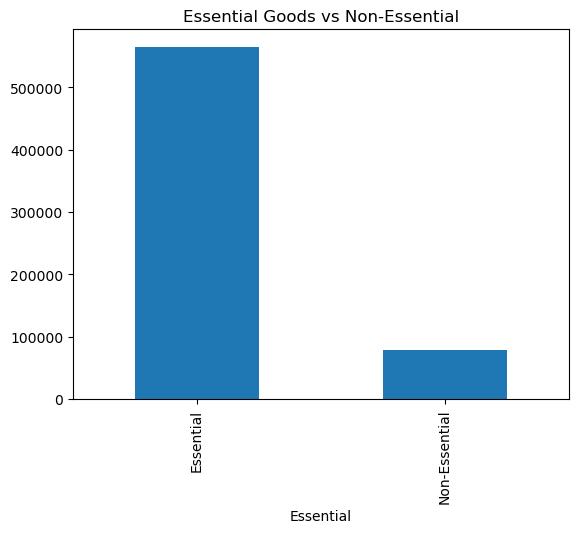

In [68]:
retail.groupby("Essential")["Price"].agg("sum").plot(kind='bar',title="Essential Goods vs Non-Essential")

In [74]:
retail.groupby("Product Category")["Price"].sum().sort_values(ascending=False)

Product Category
Meat & Poultry            220288.56
Vegetables                 80667.63
Fruits                     57883.71
Dairy & Eggs               51799.21
Cooking Essentials         44444.35
Grains & Bakery            43136.06
Infant & Baby Products     36060.73
Toiletries & Cleaning      30966.87
Canned & Jarred Goods      28501.17
Frozen Foods               15151.51
Nuts & Snacks              13883.23
Beverages                  10506.96
Legumes & Dry Goods        10115.06
Other                        819.94
Name: Price, dtype: float64

<Axes: title={'center': 'Product Expenditure Price Variance'}, ylabel='Product Category'>

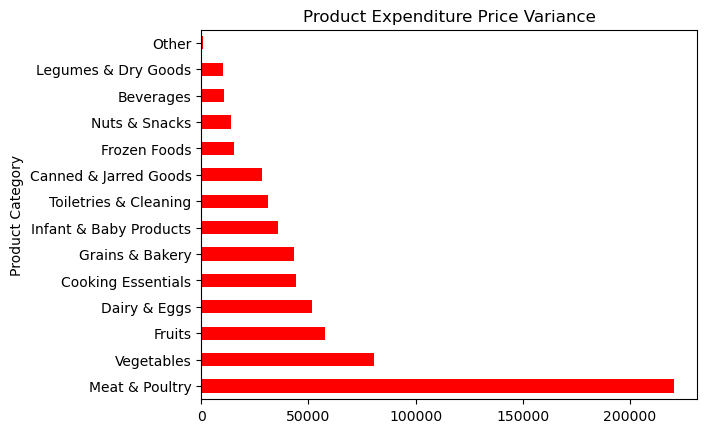

In [83]:
retail.groupby("Product Category")["Price"].sum().sort_values(ascending=False).plot(kind='barh',title="Product Expenditure Price Variance",color="red")

In [99]:
def value(x):
    return x.max() - x.min()

retail.groupby("Product Category")["Value After Tax"].agg(value)

Product Category
Beverages                  5.10
Canned & Jarred Goods      7.28
Cooking Essentials        16.66
Dairy & Eggs               7.50
Frozen Foods               4.17
Fruits                    10.89
Grains & Bakery           10.21
Infant & Baby Products    47.26
Legumes & Dry Goods        2.85
Meat & Poultry            47.15
Nuts & Snacks              3.98
Other                      1.27
Toiletries & Cleaning     20.07
Vegetables                 9.99
Name: Value After Tax, dtype: float64

In [107]:
retail.groupby(level=0)["Price"].sum().sort_values(ascending=False)

Year
2024    92076.08
2023    91044.06
2022    84846.51
2021    76991.95
2020    74227.86
2019    71721.12
2018    69152.08
2017    68591.57
2025    15573.76
Name: Price, dtype: float64

<Axes: title={'center': 'Profits'}, xlabel='Year'>

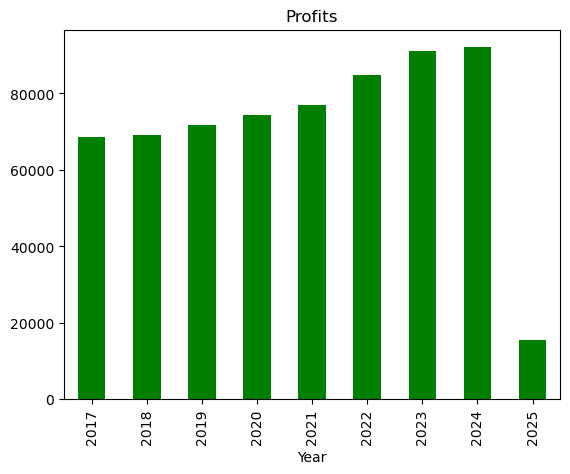

In [115]:
retail.groupby(level=0)["Price"].sum().plot(kind='bar',title="Profits",color='green')